In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
os.chdir(r'/content/drive/My Drive/NLP')
data=pd.read_csv('/content/drive/My Drive/NLP/Womens Clothing E-Commerce Reviews.csv')

In [ ]:
data.drop(data.columns[0],inplace=True, axis=1)

In [ ]:
data.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
data.isnull().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [ ]:
data.describe()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


In [ ]:
data.shape

(23486, 10)

In [ ]:
data.corr()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
Clothing ID,1.000000,0.017972,-0.018879,-0.016206,0.046356
Age,0.017972,1.000000,0.026831,0.030622,0.043079
Rating,-0.018879,0.026831,1.000000,0.792336,-0.064961
Recommended IND,-0.016206,0.030622,0.792336,1.000000,-0.069045
Positive Feedback Count,0.046356,0.043079,-0.064961,-0.069045,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


## Introduction:
My goal form this dataset is to understand what is that customers like and dislike about the prodcut and provide actionable recommendations

In [ ]:
data.isnull().sum().sum()

4697

In [ ]:
## Deleting missing values
for x in ["Division Name","Department Name","Class Name","Review Text"]:
    data = data[data[x].notnull()]



In [ ]:
data.isnull().sum()

Clothing ID                   0
Age                           0
Title                      2966
Review Text                   0
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                 0
Department Name               0
Class Name                    0
dtype: int64

In [ ]:
unique_count = []
for x in data.columns:
    unique_count.append([x,len(data[x].unique()),data[x].isnull().sum()])

In [ ]:
unique_count

[['Clothing ID', 1172, 0],
 ['Age', 77, 0],
 ['Title', 13984, 2966],
 ['Review Text', 22621, 0],
 ['Rating', 5, 0],
 ['Recommended IND', 2, 0],
 ['Positive Feedback Count', 82, 0],
 ['Division Name', 3, 0],
 ['Department Name', 6, 0],
 ['Class Name', 20, 0]]

In [ ]:
## creating new columns:
data['word_count']=data['Review Text'].str.split().apply(len)
data['word_length']=data['Review Text'].apply(len)
data['Label']=0
data.loc[data.Rating>3,['Label']]=1

In [ ]:
data.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,word_count,word_length,Label
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,8,53,1
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,62,303,1
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,98,500,0
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,22,124,1
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,36,192,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f151e25f2e8>,
      dtype=object)

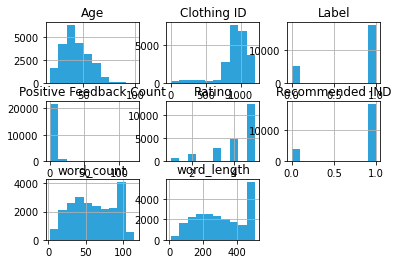

In [ ]:
data.hist()

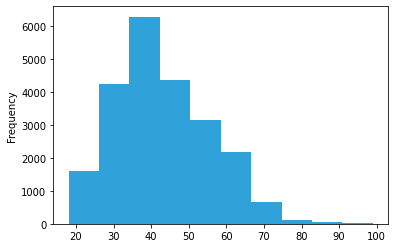

In [ ]:
data['Age'].plot(kind='hist')

In [ ]:
## Explanation of code till now:

## Univariate Analysis:

In [ ]:
print("Datafarme dimension Rows: {},Columns: {}".format(*data.shape))

Datafarme dimension Rows: 22628,Columns: 13


In [ ]:
pd.DataFrame(unique_count, columns=['Column','Unique','Missing']).set_index('Column').T

Column,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
Unique,1172,77,13984,22621,5,2,82,3,6,20
Missing,0,0,2966,0,0,0,0,0,0,0


## Seems like almost 3000 missing values

In [ ]:
data.describe().T.drop("count",axis=1)

,mean,std,min,25%,50%,75%,max
Clothing ID,919.695908,201.683804,1.0,861.0,936.0,1078.0,1205.0
Age,43.282880,12.328176,18.0,34.0,41.0,52.0,99.0
Rating,4.183092,1.115911,1.0,4.0,5.0,5.0,5.0
Recommended IND,0.818764,0.385222,0.0,1.0,1.0,1.0,1.0
Positive Feedback Count,2.631784,5.787520,0.0,0.0,1.0,3.0,122.0
word_count,60.211950,28.533053,2.0,36.0,59.0,88.0,115.0
word_length,308.761534,143.934126,9.0,186.0,302.0,459.0,508.0
Label,0.770506,0.420517,0.0,1.0,1.0,1.0,1.0


In [ ]:
data[['Title','Department Name','Division Name','Class Name']].describe().T.drop("count",axis=1)

,unique,top,freq
Title,13983,Love it!,136
Department Name,6,Tops,10048
Division Name,3,General,13365
Class Name,20,Dresses,6145


Text(0.5, 1.0, 'Count distribution')

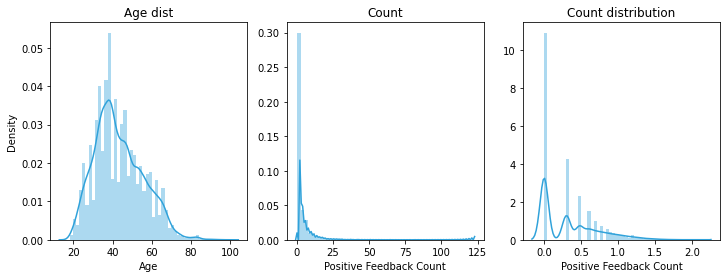

In [ ]:
f,ax=plt.subplots(1,3,figsize=(12,4),sharey=False)
sns.distplot(data['Age'],ax=ax[0])
ax[0].set_title('Age dist')
ax[0].set_ylabel('Density')
sns.distplot(data['Positive Feedback Count'],ax=ax[1])
ax[1].set_title('Count')
sns.distplot(np.log10((data['Positive Feedback Count'][data["Positive Feedback Count"].notnull()]+1)), ax=ax[2])
ax[2].set_title('Count distribution')

## 

# Division name and department name distribution:


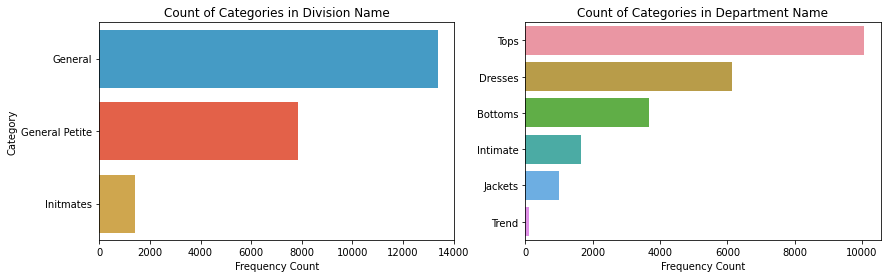

In [ ]:
row_plots=['Division Name','Department Name']
f,axes=plt.subplots(1, len(row_plots),figsize=(14,4),sharex=False)

for i,x in enumerate(row_plots):
    sns.countplot(y=x, data=data,order=data[x].value_counts().index, ax=axes[i])
    axes[i].set_title("Count of Categories in {}".format(x))
    axes[i].set_xlabel("")
    axes[i].set_xlabel("Frequency Count")
axes[0].set_ylabel("Category")
axes[1].set_ylabel("")
plt.show()

In [ ]:
## it is notable that Tops and Dresses are most reviewed products

Distribution of Clothing_ID

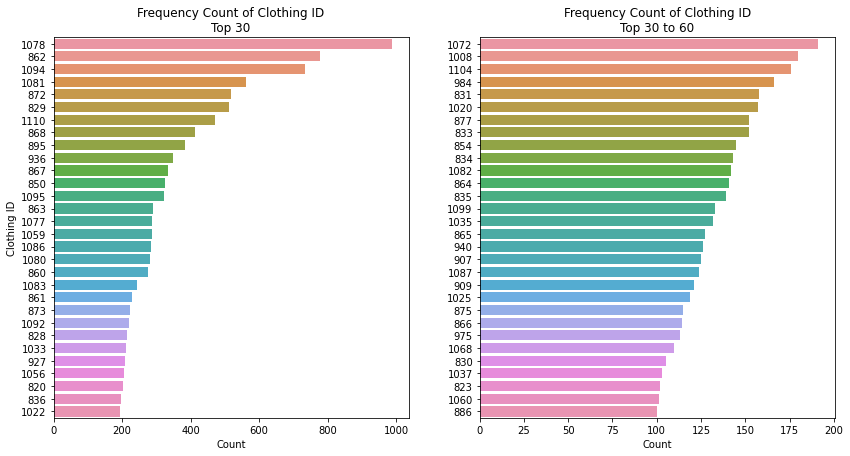

Dataframe Dimension: 22628 Rows


,mean,std,min,25%,50%,75%,max
Clothing ID,1015.4848,103.396022,862.0,862.0,1078.0,1094.0,1094.0
Age,42.7248,12.150429,18.0,34.0,41.0,51.0,99.0
Rating,4.1892,1.104306,1.0,4.0,5.0,5.0,5.0
Recommended IND,0.8184,0.385592,0.0,1.0,1.0,1.0,1.0
Positive Feedback Count,2.8624,6.773021,0.0,0.0,1.0,3.0,98.0
word_count,60.5912,28.731486,2.0,36.0,60.0,89.0,115.0
word_length,310.8604,144.836158,16.0,189.0,305.0,469.0,504.0
Label,0.7716,0.419886,0.0,1.0,1.0,1.0,1.0


In [ ]:
# Clothing ID Category
f, axes = plt.subplots(1,2, figsize=[14,7])
num = 30
sns.countplot(y="Clothing ID", data = data[data["Clothing ID"].isin(data["Clothing ID"].value_counts()[:num].index)],
              order= data["Clothing ID"].value_counts()[:num].index, ax=axes[0])
axes[0].set_title("Frequency Count of Clothing ID\nTop 30")
axes[0].set_xlabel("Count")

sns.countplot(y="Clothing ID", data = data[data["Clothing ID"].isin(data["Clothing ID"].value_counts()[num:60].index)],
              order= data["Clothing ID"].value_counts()[num:60].index, ax=axes[1])
axes[1].set_title("Frequency Count of Clothing ID\nTop 30 to 60")
axes[1].set_ylabel("")
axes[1].set_xlabel("Count")
plt.show()

print("Dataframe Dimension: {} Rows".format(data.shape[0]))
data[data["Clothing ID"].isin([1078, 862,1094])].describe().T.drop("count",axis=1)

In [ ]:
data.loc[data["Clothing ID"].isin([1078, 862,1094]),
       ["Title", "Division Name","Department Name","Class Name"]].describe(include=["O"]).T.drop("count",axis=1)

,unique,top,freq
Title,1815,Beautiful dress,21
Division Name,2,General,1524
Department Name,2,Dresses,1722
Class Name,2,Dresses,1722


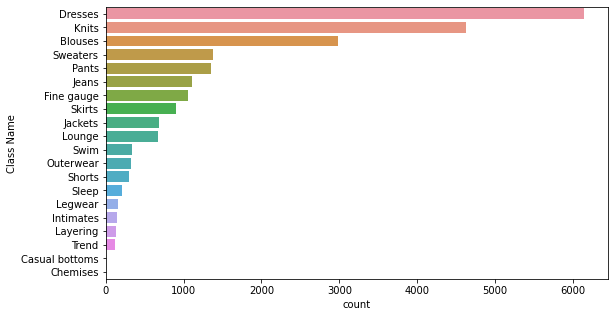

In [ ]:
## Distribution of Class name:
plt.subplots(figsize=(9,5))
sns.countplot(y='Class Name',data=data, order=data['Class Name'].value_counts().index)

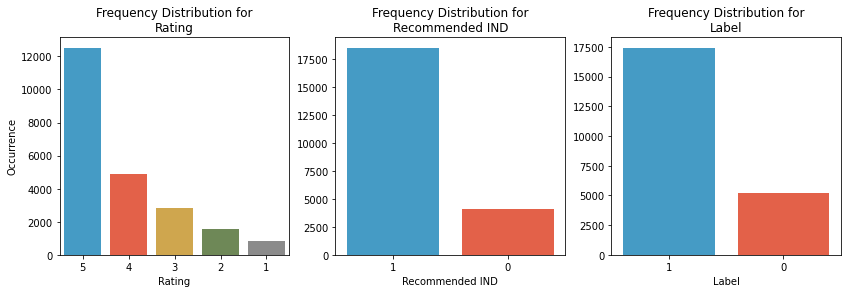

In [ ]:
# Distribution of Rating, recommenedeID, Label)
cat_dtypes = ["Rating","Recommended IND","Label"]
increment = 0
f, axes = plt.subplots(1,len(cat_dtypes), figsize=(14,4), sharex=False)

for i in range(len(cat_dtypes)):
    sns.countplot(x=cat_dtypes[increment], data=data,order=data[cat_dtypes[increment]].value_counts().index, ax=axes[i])
    axes[i].set_title("Frequency Distribution for\n{}".format(cat_dtypes[increment]))
    axes[i].set_ylabel("Occurrence")
    axes[i].set_xlabel("{}".format(cat_dtypes[increment]))
    increment += 1
axes[1].set_ylabel("")
axes[2].set_ylabel("")
plt.show()


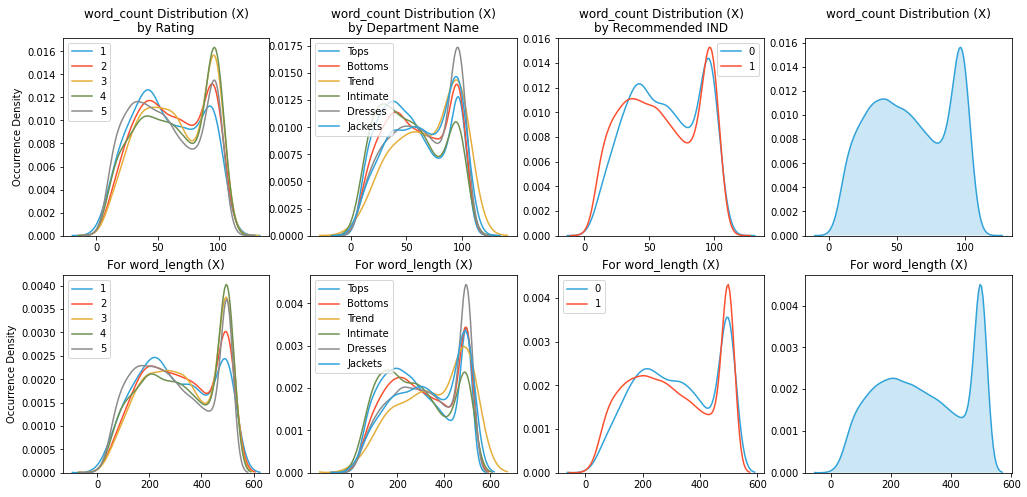

Correlation Coefficient of Word Cound and Character Count: 0.99

Total Word Count is: 1362476
Total Character Count is: 6986656


,count,mean,std,min,25%,50%,75%,max
word_count,22628.0,60.211950,28.533053,2.0,36.0,59.0,88.0,115.0
word_length,22628.0,308.761534,143.934126,9.0,186.0,302.0,459.0,508.0


In [ ]:
## Word and Character count contribution in Ratings and Reviews:


f, axes = plt.subplots(2,4, figsize=(17,8), sharex=False)
for ii, xvar in enumerate(['word_count', "word_length"]):
    for i,y in enumerate(["Rating","Department Name","Recommended IND"]):
        for x in set(data[y][data[y].notnull()]):
            sns.kdeplot(data[xvar][data[y]==x], label=x, shade=False, ax=axes[ii,i])
        if ii is 0:
            axes[ii,i].set_title('{} Distribution (X)\nby {}'.format(xvar, y))
        else:
            axes[ii,i].set_title('For {} (X)'.format(xvar))
    axes[ii,0].set_ylabel('Occurrence Density')
    axes[ii,i].set_xlabel('')
    # Plot 4
    sns.kdeplot(data[xvar],shade=True,ax=axes[ii,3])
    axes[ii,3].set_xlabel("")
    if ii is 0:
        axes[ii,3].set_title('{} Distribution (X)\n'.format(xvar))
    else:
        axes[ii,3].set_title('For {} (X)'.format(xvar))
    axes[ii,3].legend_.remove()
plt.show()

print("Correlation Coefficient of Word Cound and Character Count: {}".format(
    round(data["word_count"].corr(data["word_length"]), 2)))

print("\nTotal Word Count is: {}".format(data["word_count"].sum()))
print("Total Character Count is: {}".format(data["word_length"].sum()))
data[["word_count","word_length"]].describe().T

In [ ]:
## Multivariate Analysis:
## Categorical variable by Categorical variable
#In this section, I utilize heatmaps to visualize the percentage occurrence pivot table. Note that I heavily 
# utilized the technique of normalizing the proportion between variables classes by converting frequency 
# into percentages. This technique is very fruitful because the relation upon which the percentage can be explored 
# by aggregate, by index, and by column, each of which providing its own unique insight.

Text(0.5, 1.0, 'Division name count by Department Name-Crosstab\nHeatmap Overall percentage Disrtibution')

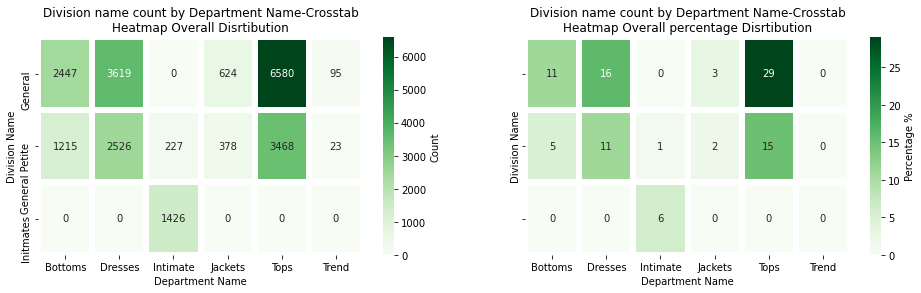

In [ ]:
# Division Name by Department Nsme:
f,ax=plt.subplots(1,2,figsize=(16,4),sharey=True)
sns.heatmap(pd.crosstab(data['Division Name'],data['Department Name']),annot=True,linewidths=5,ax=ax[0],fmt='g',
            cmap='Greens',cbar_kws={'label':'Count'})
ax[0].set_title('Division name count by Department Name-Crosstab\nHeatmap Overall Disrtibution')
sns.heatmap(pd.crosstab(data['Division Name'],data['Department Name'],normalize=True).mul(100).round(0),
annot=True,linewidths=5,ax=ax[1],fmt='g',cmap='Greens', cbar_kws={'lab#el':'Percentage %'})
ax[1].set_title('Division name count by Department Name-Crosstab\nHeatmap Overall percentage Disrtibution')

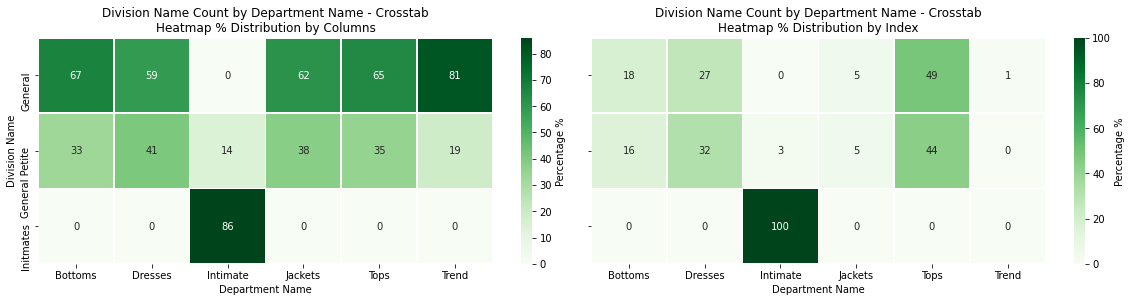

In [ ]:
# Heatmaps of Percentage Pivot Table
f, ax = plt.subplots(1,2,figsize=(16, 4), sharey=True)
sns.heatmap(pd.crosstab(data['Division Name'], data["Department Name"], normalize='columns').mul(100).round(0),
            annot=True, linewidths=.5, ax=ax[0],fmt='g', cmap="Greens",
                cbar_kws={'label': 'Percentage %'})
ax[0].set_title('Division Name Count by Department Name - Crosstab\nHeatmap % Distribution by Columns')

sns.heatmap(pd.crosstab(data['Division Name'], data["Department Name"], normalize='index').mul(100).round(0),
            annot=True, linewidths=.5, ax=ax[1],fmt='g', cmap="Greens",
                cbar_kws={'label': 'Percentage %'})
ax[1].set_title('Division Name Count by Department Name - Crosstab\nHeatmap % Distribution by Index')
ax[1].set_ylabel('')
plt.tight_layout(pad=0)
plt.show()

# Class Name by Department Name:

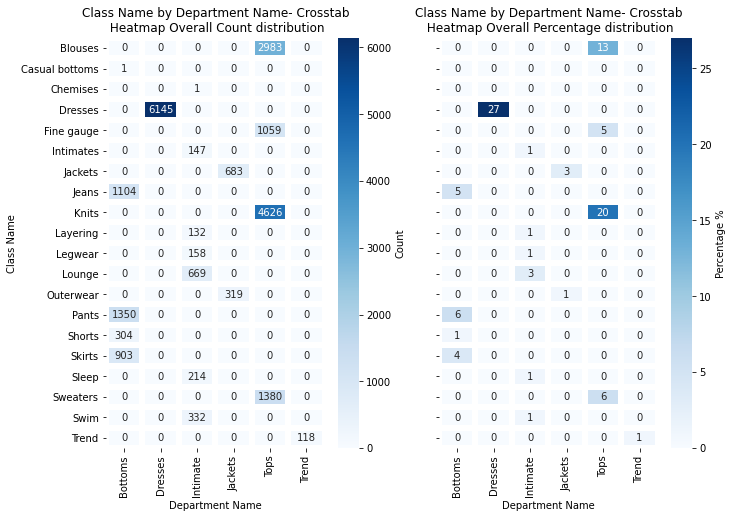

In [ ]:
f,ax=plt.subplots(1,2,figsize=(10,7),sharey=True)
sns.heatmap(pd.crosstab(data['Class Name'],data['Department Name']),annot=True,linewidths=5,
            ax=ax[0],fmt='g',cmap='Blues',cbar_kws={'label':'Count'})
ax[0].set_title('Class Name by Department Name- Crosstab\n Heatmap Overall Count distribution')
sns.heatmap(pd.crosstab(data['Class Name'],data['Department Name'],normalize=True).mul(100).round(0),annot=True,
            linewidths=5,
            ax=ax[1],fmt='g',cmap='Blues',cbar_kws={'label':'Percentage %'})
ax[1].set_title('Class Name by Department Name- Crosstab\n Heatmap Overall Percentage distribution')
ax[1].set_ylabel('')
plt.tight_layout(pad=0)
plt.show()

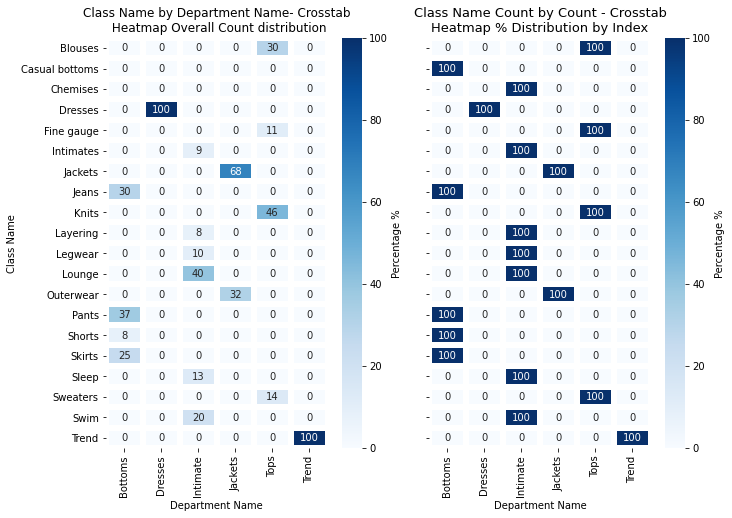

In [ ]:
f,ax=plt.subplots(1,2,figsize=(10,7),sharey=True)
fsize=13
sns.heatmap(pd.crosstab(data['Class Name'],data['Department Name'],normalize='columns').mul(100).round(0),annot=True,linewidths=5,
            ax=ax[0],fmt='g',cmap='Blues',cbar_kws={'label':'Percentage %'})
ax[0].set_title('Class Name by Department Name- Crosstab\n Heatmap Overall Count distribution')
sns.heatmap(pd.crosstab(data['Class Name'],data['Department Name'],normalize='index').mul(100).round(0),annot=True,linewidths=5,
            ax=ax[1],fmt='g',cmap='Blues',cbar_kws={'label':'Percentage %'})
ax[1].set_title('Class Name Count by Count - Crosstab\nHeatmap % Distribution by Index', fontsize = fsize)
ax[1].set_ylabel('')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
## Class Name by divison Name


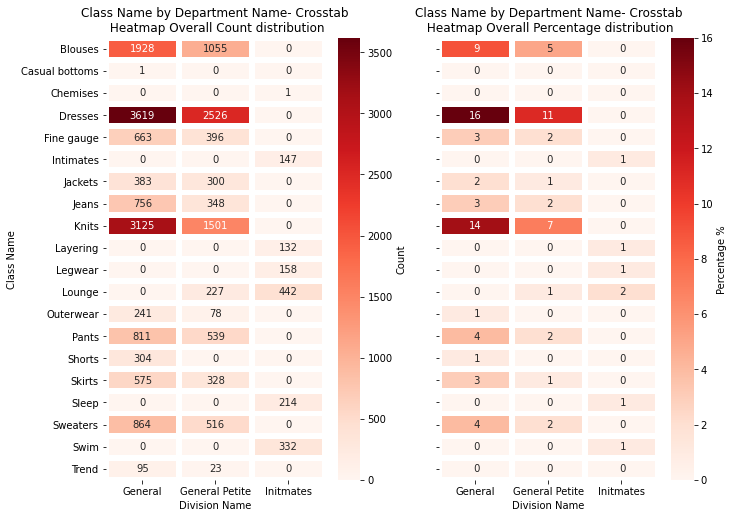

In [ ]:
f,ax=plt.subplots(1,2,figsize=(10,7),sharey=True)
sns.heatmap(pd.crosstab(data['Class Name'],data['Division Name']),annot=True,linewidths=5,
            ax=ax[0],fmt='g',cmap='Reds',cbar_kws={'label':'Count'})
ax[0].set_title('Class Name by Department Name- Crosstab\n Heatmap Overall Count distribution')
sns.heatmap(pd.crosstab(data['Class Name'],data['Division Name'],normalize=True).mul(100).round(0),annot=True,
            linewidths=5,
            ax=ax[1],fmt='2g',cmap='Reds',cbar_kws={'label':'Percentage %'})
ax[1].set_title('Class Name by Department Name- Crosstab\n Heatmap Overall Percentage distribution')
ax[1].set_ylabel('')
plt.tight_layout(pad=0)
plt.show()

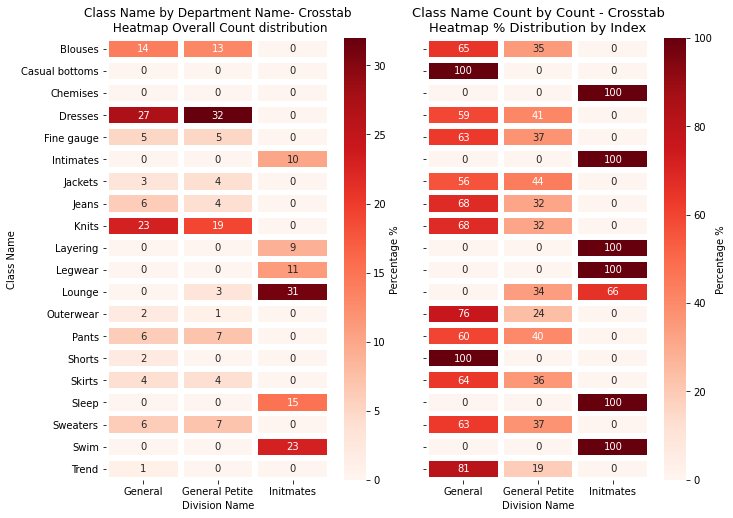

In [ ]:
f,ax=plt.subplots(1,2,figsize=(10,7),sharey=True)
fsize=13
sns.heatmap(pd.crosstab(data['Class Name'],data['Division Name'],normalize='columns').mul(100).round(0),annot=True,linewidths=5,
            ax=ax[0],fmt='g',cmap='Reds',cbar_kws={'label':'Percentage %'})
ax[0].set_title('Class Name by Department Name- Crosstab\n Heatmap Overall Count distribution')
sns.heatmap(pd.crosstab(data['Class Name'],data['Division Name'],normalize='index').mul(100).round(0),annot=True,linewidths=5,
            ax=ax[1],fmt='2g',cmap='Reds',cbar_kws={'label':'Percentage %'})
ax[1].set_title('Class Name Count by Count - Crosstab\nHeatmap % Distribution by Index', fontsize = fsize)
ax[1].set_ylabel('')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

import numpy as np
import pandas as pd
import nltk
import random
import os
from os import path
from PIL import Image

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

# Set Plot Theme
sns.set_palette([
    "#30a2da",
    "#fc4f30",
    "#e5ae38",
    "#6d904f",
    "#8b8b8b",
])
# Alternate # plt.style.use('fivethirtyeight')

# Pre-Processing
import string
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re
from nltk.stem import PorterStemmer

# Modeling
import statsmodels.api as sm
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk.util import ngrams
from collections import Counter
from gensim.models import word2vec

# Warnings
import warnings
warnings.filterwarnings('ignore')

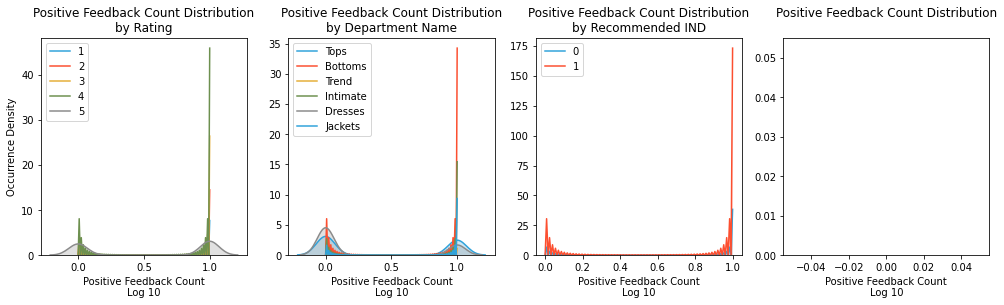

In [ ]:
## Continuous variable by Categorical variable
# kdeplot -kernel density estimate:
f,axes=plt.subplots(1,4,figsize=(17,4),sharex=False)
xvar='Positive Feedback Count'
plotdata = np.log10(data['Positive Feedback Count'])
for i,y in enumerate(["Rating","Department Name","Recommended IND"]):
    for x in set(data[y][data[y].notnull()]):
        sns.kdeplot(data[y]==x, label=x, shade=True, ax=axes[i])
        axes[i].set_xlabel("{}\nLog 10".format(xvar))
        axes[i].set_label('Occurrence Density')
        axes[i].set_title('{} Distribution\nby {}'.format(xvar, y))
axes[0].set_ylabel('Occurrence Density')

sns.kdeplot(plotdata,shade=True,ax=axes[3])
axes[3].set_xlabel("{}\nLog 10".format(xvar))
axes[3].set_title('{} Distribution\n'.format(xvar))
axes[3].legend_.remove()
plt.show()

In [ ]:
sns.kdeplot(plotdata,shade=True,ax=axes[3])

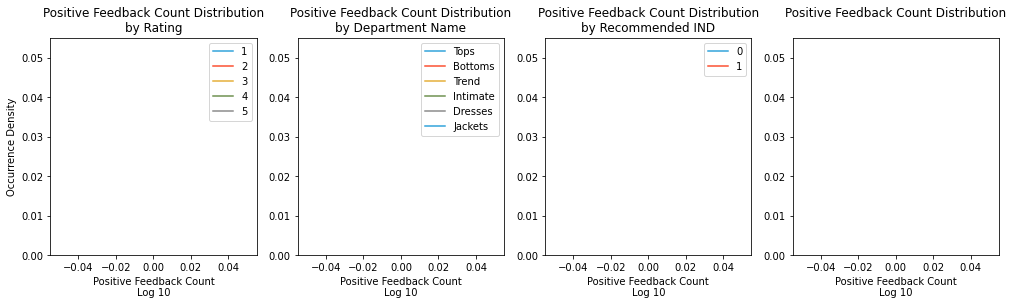

In [ ]:
f, axes = plt.subplots(1,4, figsize=(17,4), sharex=False)
xvar = 'Positive Feedback Count'
plot1 = np.log10(data['Positive Feedback Count'])
for i,y in enumerate(["Rating","Department Name","Recommended IND"]):
    for x in set(data[y][data[y].notnull()]):
        sns.kdeplot(plot1[data[y]==x], label=x, shade=True, ax=axes[i])
    axes[i].set_xlabel("{}\nLog 10".format(xvar))
    axes[i].set_label('Occurrence Density')
    axes[i].set_title('{} Distribution\nby {}'.format(xvar, y))
axes[0].set_ylabel('Occurrence Density')
# Plot 4
sns.kdeplot(plot1,shade=True,ax=axes[3])
axes[3].set_xlabel("{}\nLog 10".format(xvar))
axes[3].set_title('{} Distribution\n'.format(xvar))
axes[3].legend_.remove()
plt.show()

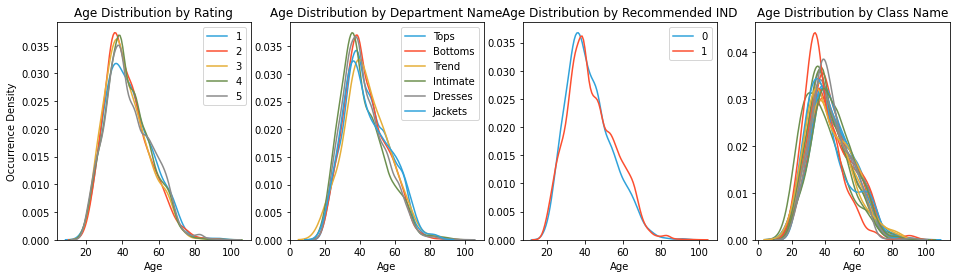

In [ ]:
f, axes = plt.subplots(1,4, figsize=(16,4), sharex=False)
xvar = "Age"
plotdf = data["Age"]
for i,y in enumerate(["Rating","Department Name","Recommended IND"]):
    for x in set(data[y][data[y].notnull()]):
        sns.kdeplot(plotdf[data[y]==x], label=x, shade=False, ax=axes[i])
    axes[i].set_xlabel("{}".format(xvar))
    axes[i].set_label('Occurrence Density')
    axes[i].set_title('{} Distribution by {}'.format(xvar, y))

for x in set(data["Class Name"][data["Class Name"].notnull()]):
    sns.kdeplot(plotdf[data["Class Name"]==x], label=x, shade=False, ax=axes[3])

axes[3].legend_.remove()
axes[3].set_xlabel('{}'.format(xvar))
axes[0].set_ylabel('Occurrence Density')
axes[3].set_title('{} Distribution by {}'.format(xvar, "Class Name"))
plt.show()

In [ ]:
## Continuous varaible by Continuous variable

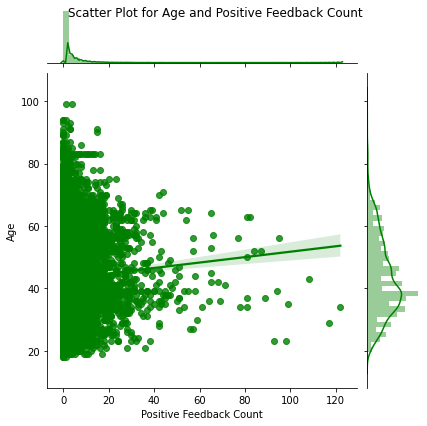

In [ ]:
## normalization function. 
def minmaxscaler(data):
    return (data-data.min())/(data.max()-data.min())
def zscorenomalize(data):
    return (data - data.mean())/data.std()

g = sns.jointplot(x= data["Positive Feedback Count"], y=data["Age"], kind='reg', color='g')
g.fig.suptitle("Scatter Plot for Age and Positive Feedback Count")
plt.show()

In [ ]:
def percentstandardize_barplot(x,y,hue, data, ax=None, order= None):
    """
    Standardize by percentage the data using pandas functions, then plot using Seaborn.
    Function arguments are and extention of Seaborns'.
    """
    sns.barplot(x= x, y=y, hue=hue, ax=ax, order=order,
    data=(data[[x, hue]]
     .reset_index(drop=True)
     .groupby([x])[hue]
     .value_counts(normalize=True)
     .rename('Percentage').mul(100)
     .reset_index()
     .sort_values(hue)))
    plt.title("Percentage Frequency of {} by {}".format(hue,x))
    plt.ylabel("Percentage %")

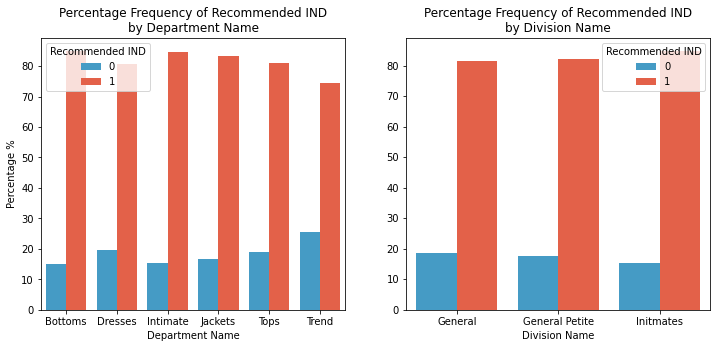

In [ ]:
huevar = "Recommended IND"
f, axes = plt.subplots(1,2,figsize=(12,5))
percentstandardize_barplot(x="Department Name",y="Percentage", hue=huevar,data=data, ax=axes[0])
axes[0].set_title("Percentage Frequency of {}\nby Department Name".format(huevar))
axes[0].set_ylabel("Percentage %")
percentstandardize_barplot(x="Division Name",y="Percentage", hue=huevar,data=data, ax=axes[1])
axes[1].set_title("Percentage Frequency of {}\nby Division Name".format(huevar))
axes[1].set_ylabel("")
plt.show()

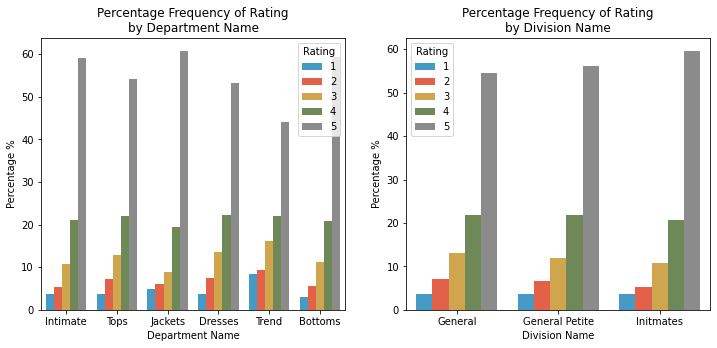

In [ ]:
#Rating by Department and Divison Name

xvar = ["Department Name","Division Name"]
huevar = "Rating"
f, axes = plt.subplots(1,2,figsize=(12,5))
percentstandardize_barplot(x=xvar[0],y="Percentage", hue=huevar,data=data, ax=axes[0])
axes[0].set_title("Percentage Frequency of {}\nby {}".format(huevar, xvar[0]))
axes[0].set_ylabel("Percentage %")
percentstandardize_barplot(x=xvar[1],y="Percentage", hue="Rating",data=data, ax=axes[1])
axes[1].set_title("Percentage Frequency of {}\nby {}".format(huevar, xvar[1]))
plt.show()

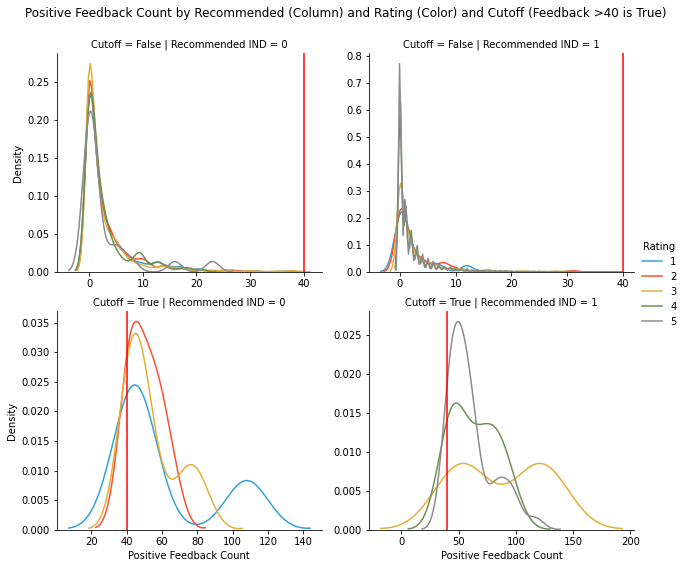

In [ ]:
# Positive Feedback Count over 40 by Recomended IND and Rating# Cuttoff Variable
data["Cutoff"] = data["Positive Feedback Count"] >= 40 # Temporary variable for facetgrid
# Facet Grid Plot
g = sns.FacetGrid(data, row = "Cutoff", col="Recommended IND",
                  hue="Rating", size=4, aspect=1.1, sharey=False, sharex=False)
g.map(sns.distplot, "Positive Feedback Count", hist=False)
g.add_legend()
g.axes[0,0].set_ylabel('Density')
g.axes[1,0].set_ylabel('Density')
plt.subplots_adjust(top=0.90)
g.fig.suptitle('Positive Feedback Count by Recommended (Column) and Rating (Color) and Cutoff (Feedback >40 is True)')

# Give cutoff line to each plot.
for x in [0,1]:
    for y in [0,1]:
        g.axes[x,y].axvline(x=40, c="r")

plt.show()
del data["Cutoff"]


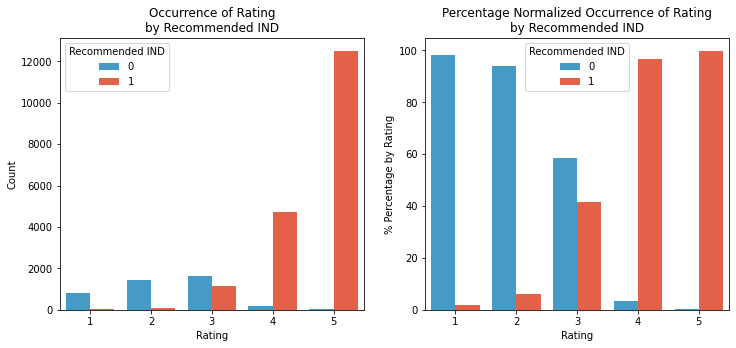

In [ ]:
# Rating by Recommneded iD
huevar = "Rating"
f, axes = plt.subplots(1,2,figsize=(12,5))
sns.countplot(x="Rating", hue="Recommended IND",data=data, ax=axes[0])
axes[0].set_title("Occurrence of {}\nby {}".format(huevar, "Recommended IND"))
axes[0].set_ylabel("Count")
percentstandardize_barplot(x="Rating",y="Percentage", hue="Recommended IND",data=data, ax=axes[1])
axes[1].set_title("Percentage Normalized Occurrence of {}\nby {}".format(huevar, "Recommended IND"))
axes[1].set_ylabel("% Percentage by Rating")
plt.show()

Multivariate Analysis and Descriptive Statistics:


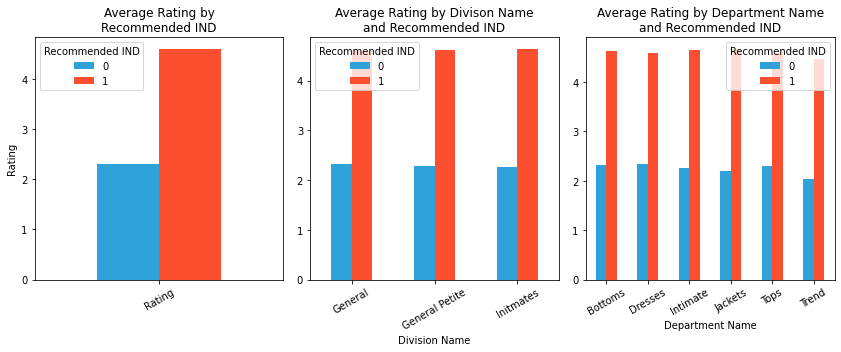

In [ ]:
# Rating by Recommended IND
f, axes = plt.subplots(1,3,figsize=(12,5))
rot = 30
data.pivot_table('Rating',
               columns=['Recommended IND']).plot.bar(ax=axes[0],rot=rot)
axes[0].set_title("Average Rating by\nRecommended IND")
data.pivot_table('Rating', index='Division Name',
               columns=['Recommended IND']).plot.bar(ax=axes[1], rot=rot)
axes[1].set_title("Average Rating by Divison Name\nand Recommended IND")
data.pivot_table('Rating', index='Department Name',
               columns=['Recommended IND']).plot.bar(ax=axes[2], rot=rot)
axes[0].set_ylabel("Rating")
axes[2].set_title("Average Rating by Department Name\nand Recommended IND")
f.tight_layout()
plt.show()

In [ ]:
 # Correlating Average Rating and Recommended IND by Clothing ID
# Analysis of data grouped by Clothing ID.

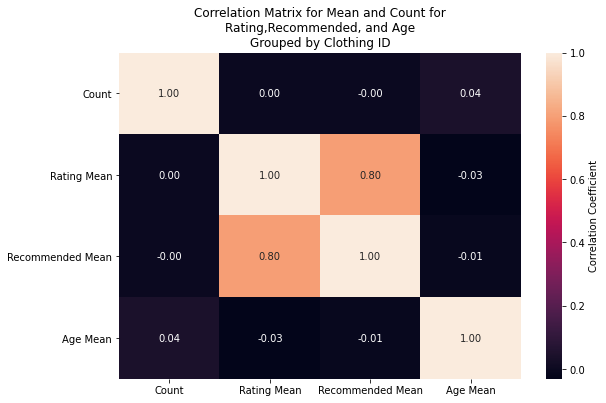

In [ ]:
temp = (data.groupby('Clothing ID')[["Rating","Recommended IND", "Age"]]
        .aggregate(['count','mean']))
temp.columns = ["Count","Rating Mean","Recommended IND Count",
                "Recommended Mean","Age Count","Age Mean"]
temp.drop(["Recommended IND Count","Age Count"], axis=1, inplace =True)

# Plot Correlation Matrix
f, ax = plt.subplots(figsize=[9,6])
ax = sns.heatmap(temp.corr()
    , annot=True, fmt=".2f",cbar_kws={'label': 'Correlation Coefficient'})
ax.set_title("Correlation Matrix for Mean and Count for\nRating,Recommended, and Age\nGrouped by Clothing ID")
plt.show()

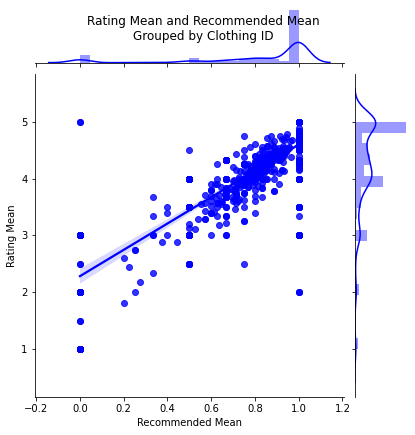

In [ ]:
g = sns.jointplot(x= "Recommended Mean",y='Rating Mean',data=temp,
                  kind='reg', color='b')
plt.subplots_adjust(top=0.999)
g.fig.suptitle("Rating Mean and Recommended Mean\nGrouped by Clothing ID")
plt.show()

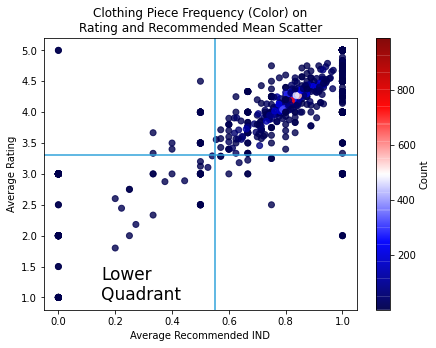

,Count,Rating Mean,Recommended Mean,Age Mean
count,204.000000,204.000000,204.000000,204.000000
mean,2.308824,2.763338,0.316315,41.883954
std,2.798261,0.819220,0.351723,10.858979
min,1.000000,1.000000,0.000000,20.000000
25%,1.000000,2.136364,0.000000,34.687500
50%,1.000000,3.000000,0.250000,41.142857
75%,2.000000,3.000000,0.500000,47.000000
max,24.000000,5.000000,1.000000,74.000000


In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(temp["Recommended Mean"],temp["Rating Mean"],
            alpha = .8, c =temp["Count"], cmap = 'seismic')
cbar = plt.colorbar() # Color bar. Vive la France!
cbar.set_label('Count', rotation=90)
plt.xlabel("Average Recommended IND")
plt.ylabel("Average Rating")
plt.title("Clothing Piece Frequency (Color) on\nRating and Recommended Mean Scatter")

# Vertical and Horizontal Lines
l = plt.axhline(y=3.3)
l = plt.axvline(x=.55)

# Text
plt.text(.15, 1, "Lower\nQuadrant", ha='left',wrap=True,fontsize=17)
plt.show()

# Descriptives for LOW QUADRANT
temp[(temp["Rating Mean"] < 3.3) | (temp["Recommended Mean"] <= .55)].describe()

In [ ]:
## Correlating Average Rating and Recommended IND by Class Name

## Stackoverflow Annotating Outliers

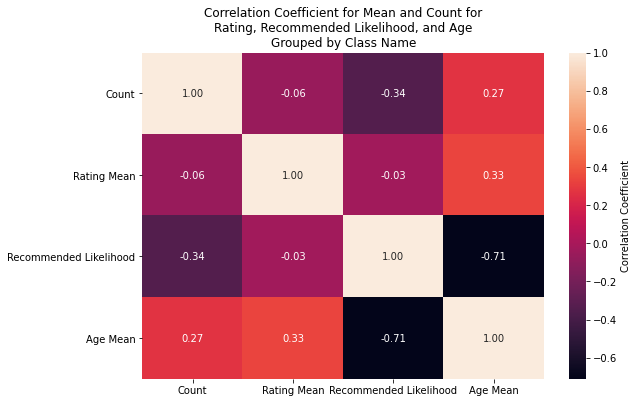

Class Categories:
 ['Intimates' 'Dresses' 'Pants' 'Blouses' 'Knits' 'Outerwear' 'Lounge'
 'Sweaters' 'Skirts' 'Fine gauge' 'Sleep' 'Jackets' 'Swim' 'Trend' 'Jeans'
 'Legwear' 'Shorts' 'Layering' 'Casual bottoms' 'Chemises']


In [ ]:
key = "Class Name"
temp = (data.groupby(key)[["Rating","Recommended IND", "Age"]]
        .aggregate(['count','mean']))
temp.columns = ["Count","Rating Mean","Recommended Likelihood Count",
                "Recommended Likelihood","Age Count","Age Mean"]
temp.drop(["Recommended Likelihood Count","Age Count"], axis=1, inplace =True)

# Plot Correlation Matrix
f, ax = plt.subplots(figsize=[9,6])
ax = sns.heatmap(temp.corr()
    , annot=True, fmt=".2f",cbar_kws={'label': 'Correlation Coefficient'})
ax.set_title("Correlation Coefficient for Mean and Count for\nRating, Recommended Likelihood, and Age\nGrouped by {}".format(key))
plt.show()
print("Class Categories:\n",data["Class Name"].unique())

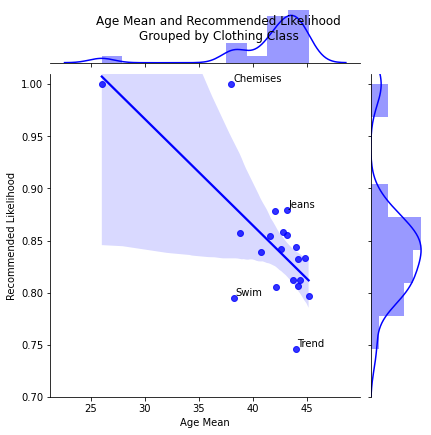

,Count,Rating Mean,Recommended Likelihood,Age Mean,resid
Class Name,,,,,
Casual bottoms,1,4.0,1.0,26.0,-0.007388
Chemises,1,4.0,1.0,38.0,0.114893


In [ ]:
# Simple Linear Regression Model
model_fit = sm.OLS(temp["Recommended Likelihood"],
               sm.add_constant(temp["Age Mean"])).fit() 
temp['resid'] = model_fit.resid

# Plot
g = sns.jointplot(y="Recommended Likelihood",x='Age Mean',data=temp,
                  kind='reg', color='b')
plt.subplots_adjust(top=0.999)
g.fig.suptitle("Age Mean and Recommended Likelihood\nGrouped by Clothing Class")
plt.ylim(.7, 1.01)

# Annotate Outliers
head = temp.sort_values(by=['resid'], ascending=[False]).head(2)
tail = temp.sort_values(by=['resid'], ascending=[False]).tail(2)

def ann(row):
    ind = row[0]
    r = row[1]
    plt.gca().annotate(ind, xy=( r["Age Mean"], r["Recommended Likelihood"]), 
            xytext=(2,2) , textcoords ="offset points", )

for row in head.iterrows():
    ann(row)
for row in tail.iterrows():
    ann(row)

plt.show()
del head, tail

temp[temp["Recommended Likelihood"] > .95]

Working with Text
## Text preprocessing

In [ ]:
pd.set_option('max_colwidth', 500)
data[["Title","Review Text", "Rating"]].sample(7)

,Title,Review Text,Rating
6205,Too sheer!,This blouse has a very cute style. the ruffles are really nice but why does it have to be so sheer? there is no way i could wear this to work without a cami. it also felt slightly on the small size - almost too tight for my normal size.,2
21473,Cute shirt,7 months pregnant with twins and i prefer to buy regular clothes that can be worn post pregnancy as well as when pregnant. went to a dr. apt and the receptionist loved this shirt. i told her it was non-maternity and she can buy it at retailer... i think she stopped by on her way home from work.,5
6996,"Lovely on the model, but not for me","I'm 5'3 and ordered the small. as soon as i saw it in person, i knew it was an item to return. the material is too transparent, and designed to wear with undergarments or swim gear that you want people to see. it was way too long for me. i think it would work for a taller person. i just didn't feel it was worth the money for the quality and transparency.",1
13999,Much cuter than i expectecd!,"I looked at this top online & thought abt wearing w/ shorts (later) & saw that it's cotton which i love. decided to order my usual size small in the black & the moss. arrived yesterday... happened to have on a pair of leggings & tried on the tops. wow, really cute w/ leggings... looks like i can wear w/ skinnys, shorts, or leggings so i'm happy w/ that. may even go w/ a skirt or slacks.\nthe cap sleeves are cute & the top flares some but not over-whelming or maternity-like. plenty of room on...",5
8174,Lovely - exactly as pictured.,Love this skirt - it looks precisely as the photo depicts. the metallic stitching may be a little bothersome for some in terms of itching/scratching. i&#39;m 5&#39;8&quot; 135# and the 6 fit perfectly (pear/hourglass).,5
11375,Great fit,"Cute colored jeans. ordered the sky color & when it arrived, the color was a medium moss green color. the color was beautiful but was expecting a light blue so sadly i returned them.",5
22620,Ripped before i could even wear it,"In a sea of dresses, this is the one that caught my eye in the whole store. i am a pear shape, and ended up trying both the medium and the large, taking the medium home. it was super flattering on, and was an appropriate length to pair with tights.\n\nhere's where the problem happened. i wanted to wear this dress for thanksgiving, i put it on, and as i tightened the drawstring to cinch in the waist - riiiiiiiiiip! the drawstring ripped through the fabric at the waistband. so disappointed.",1


In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
# Pre-Processing
SIA = SentimentIntensityAnalyzer()
data["Review Text"]= data["Review Text"].astype(str)

# Applying Model, Variable Creation
data['Polarity Score']=data["Review Text"].apply(lambda x:SIA.polarity_scores(x)['compound'])
data['Neutral Score']=data["Review Text"].apply(lambda x:SIA.polarity_scores(x)['neu'])
data['Negative Score']=data["Review Text"].apply(lambda x:SIA.polarity_scores(x)['neg'])
data['Positive Score']=data["Review Text"].apply(lambda x:SIA.polarity_scores(x)['pos'])

# Converting 0 to 1 Decimal Score to a Categorical Variable
data['Sentiment']=''
data.loc[data['Polarity Score']>0,'Sentiment']='Positive'
data.loc[data['Polarity Score']==0,'Sentiment']='Neutral'
data.loc[data['Polarity Score']<0,'Sentiment']='Negative'

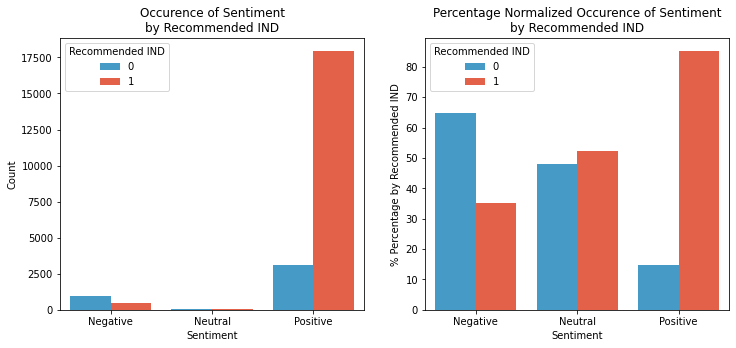

In [ ]:
huevar = "Recommended IND"
xvar = "Sentiment"
f, axes = plt.subplots(1,2,figsize=(12,5))
sns.countplot(x=xvar, hue=huevar,data=data, ax=axes[0], order=["Negative","Neutral","Positive"])
axes[0].set_title("Occurence of {}\nby {}".format(xvar, huevar))
axes[0].set_ylabel("Count")
percentstandardize_barplot(x=xvar,y="Percentage", hue=huevar,data=data, ax=axes[1])
axes[1].set_title("Percentage Normalized Occurence of {}\nby {}".format(xvar, huevar))
axes[1].set_ylabel("% Percentage by {}".format(huevar))
plt.show()

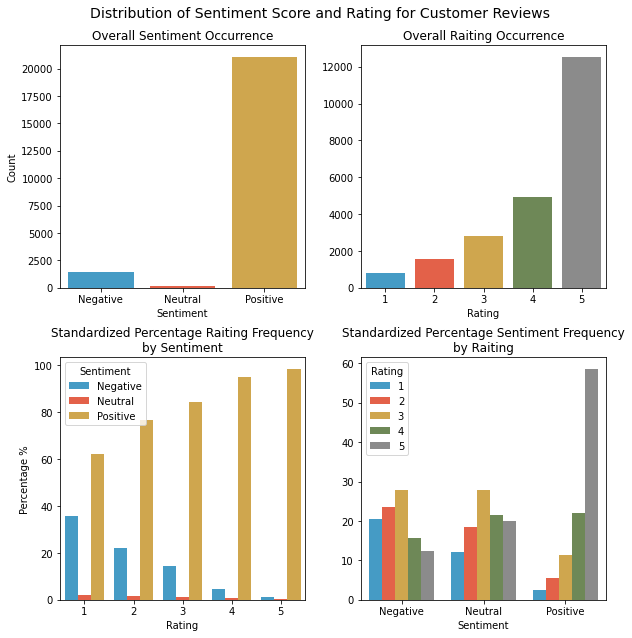

In [ ]:
f, axes = plt.subplots(2,2, figsize=[9,9])
sns.countplot(x="Sentiment", data=data, ax=axes[0,0], order=["Negative","Neutral","Positive"])
axes[0,0].set_xlabel("Sentiment")
axes[0,0].set_ylabel("Count")
axes[0,0].set_title("Overall Sentiment Occurrence")

sns.countplot(x="Rating", data=data, ax=axes[0,1])
axes[0,1].set_xlabel("Rating")
axes[0,1].set_ylabel("")
axes[0,1].set_title("Overall Raiting Occurrence")

percentstandardize_barplot(x="Rating",y="Percentage",hue="Sentiment",data=data, ax=axes[1,0])
axes[1,0].set_xlabel("Rating")
axes[1,0].set_ylabel("Percentage %")
axes[1,0].set_title("Standardized Percentage Raiting Frequency\nby Sentiment")

percentstandardize_barplot(x="Sentiment",y="Percentage",hue="Rating",data=data, ax=axes[1,1])
axes[1,1].set_ylabel("Occurrence Frequency")
axes[1,1].set_title("Standardized Percentage Sentiment Frequency\nby Raiting")
axes[1,1].set_xlabel("Sentiment")
axes[1,1].set_ylabel("")

f.suptitle("Distribution of Sentiment Score and Rating for Customer Reviews", fontsize=14)
f.tight_layout()
f.subplots_adjust(top=0.92)
plt.show()

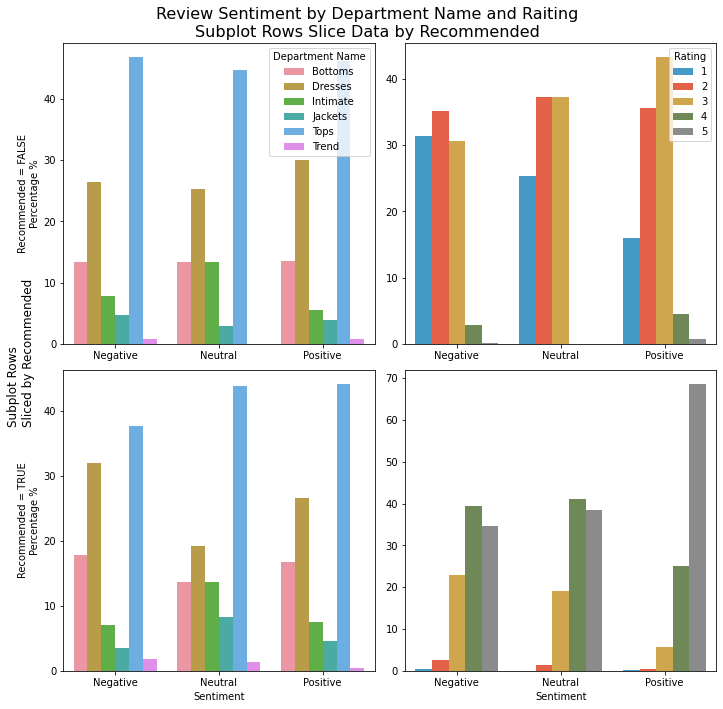

In [ ]:
# Tweakable Variables (Note to Change Order Arguement if Xvar is changed)
xvar = "Sentiment"
huevar = "Department Name"
rowvar = "Recommended IND"

# Plot
f, axes = plt.subplots(2,2,figsize=(10,10), sharex=False,sharey=False)
for i,x in enumerate(set(data[rowvar][data[rowvar].notnull()])):
    percentstandardize_barplot(x=xvar,y="Percentage", hue=huevar,data=data[data[rowvar] == x],
                 ax=axes[i,0], order=["Negative","Neutral","Positive"])
    percentstandardize_barplot(x=xvar,y="Percentage", hue="Rating",data=data[data[rowvar] == x],
                 ax=axes[i,1], order=["Negative","Neutral","Positive"])

# Plot Aesthetics
axes[1,0].legend_.remove()
axes[1,1].legend_.remove()
axes[0,1].set_ylabel("")
axes[1,1].set_ylabel("")
axes[0,0].set_xlabel("")
axes[0,1].set_xlabel("")
axes[0,0].set_ylabel("Recommended = FALSE\nPercentage %")
axes[1,0].set_ylabel("Recommended = TRUE\nPercentage %")
axes[1,1].set_title("")

# Common title and ylabel
f.text(0.0, 0.5, 'Subplot Rows\nSliced by Recommended', va='center', rotation='vertical', fontsize=12)
f.suptitle("Review Sentiment by Department Name and Raiting\nSubplot Rows Slice Data by Recommended", fontsize=16)
f.tight_layout()
f.subplots_adjust(top=0.93)
plt.show()

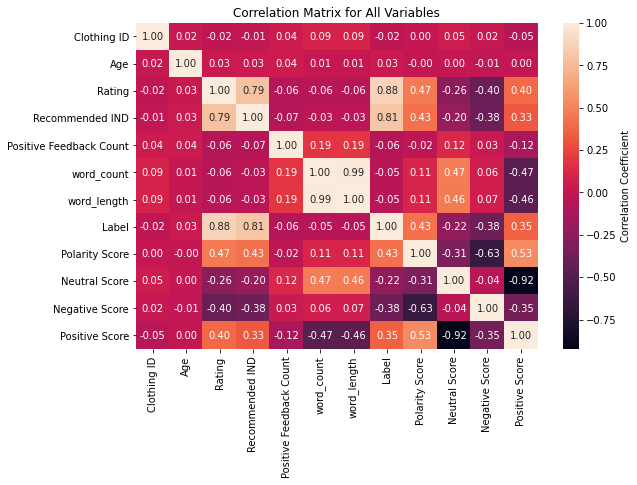

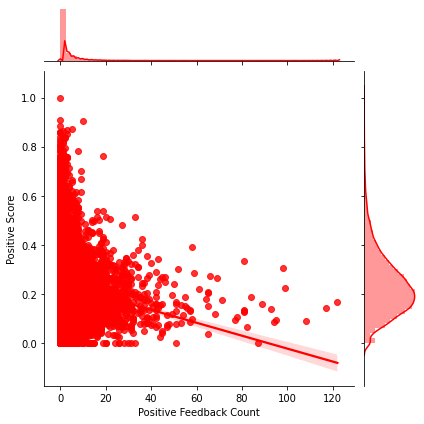

In [ ]:
# Plot Correlation Matrix
f, ax = plt.subplots(figsize=[9,6])
ax = sns.heatmap(data.corr(), annot=True,
                 fmt=".2f",cbar_kws={'label': 'Correlation Coefficient'})
ax.set_title("Correlation Matrix for All Variables")
plt.show()

# Sentiment Positivity Score by Positive Feedback Count
ax = sns.jointplot(x= data["Positive Feedback Count"], y=data["Positive Score"], kind='reg', color='r')
plt.show()

In [ ]:
## Word Cloud:
stopwords = set(STOPWORDS)
size = (10,7)

def cloud(text, title, stopwords=stopwords, size=size):
    """
    Function to plot WordCloud
    Includes: 
    """
    # Setting figure parameters
    mpl.rcParams['figure.figsize']=(10.0,10.0)
    mpl.rcParams['font.size']=12
    mpl.rcParams['savefig.dpi']=100
    mpl.rcParams['figure.subplot.bottom']=.1 
    
    # Processing Text
    # Redundant when combined with my Preprocessing function
    wordcloud = WordCloud(width=1600, height=800,
                          background_color='black',
                          stopwords=stopwords,
                         ).generate(str(text))
    
    # Output Visualization
    fig = plt.figure(figsize=size, dpi=80, facecolor='k',edgecolor='k')
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=50,color='y')
    plt.tight_layout(pad=0)
    plt.show()
    
# Frequency Calculation [One-Gram]
def wordfreqviz(text, x):
    word_dist = nltk.FreqDist(text)
    top_N = x
    rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
    matplotlib.style.use('ggplot')
    rslt.plot.bar(rot=0)

def wordfreq(text, x):
    word_dist = nltk.FreqDist(text)
    top_N = x
    rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
    return rslt

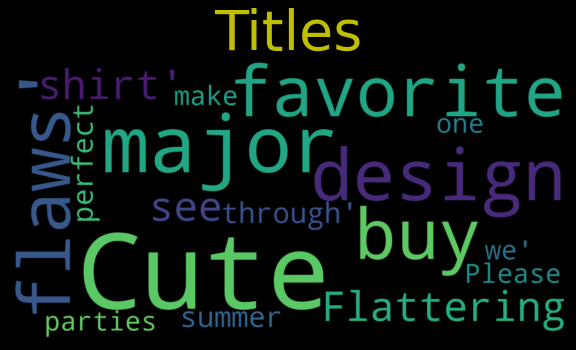

In [ ]:
# Visualize titles:
# Modify Stopwords to Exclude Class types, suchs as "dress"
new_stop = set(STOPWORDS)
new_stop.update([x.lower() for x in list(data["Class Name"][data["Class Name"].notnull()].unique())]
                + ["dress", "petite"])

# Cloud
cloud(text= data.Title[data.Title.notnull()].astype(str).values,
      title="Titles",
      stopwords= new_stop,
      size = (7,4))

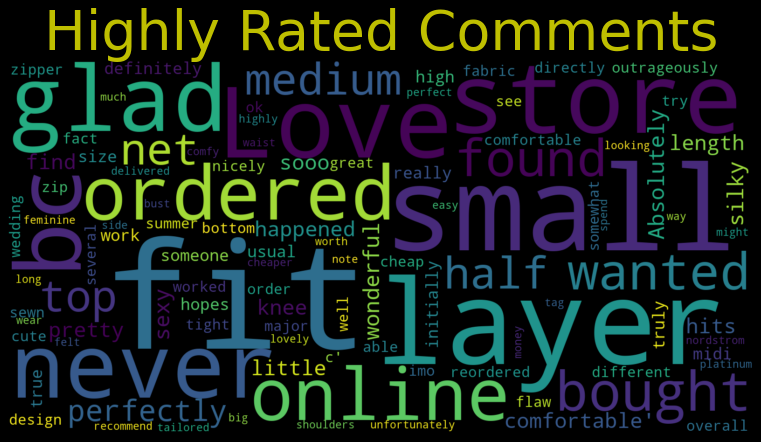

NameError: ignored

In [ ]:
## Highly Raited
title ="Highly Rated Comments"
temp = data['Review Text'][data.Rating.astype(int) >= 3]

# Modify Stopwords to Exclude Class types, suchs as "dress"
new_stop = set(STOPWORDS)
new_stop.update([x.lower() for x in list(data["Class Name"][data["Class Name"].notnull()].unique())]
                + ["dress", "petite"])

# Cloud
cloud(text= temp.values, title=title,stopwords= new_stop)

# Bar Chart
wordfreq(preprocessing(temp),20).plot.bar(rot=45, legend=False,figsize=(15,5), color='g',
                          title= title)
plt.ylabel("Occurrence Count")
plt.xlabel("Most Frequent Words")
plt.show()

# Low Raited
title ="Most Frequent Words in Low Rated Comments"
temp = df['Review Text'][df.Rating.astype(int) < 3]

# Modify Stopwords to Exclude Class types, suchs as "dress"
new_stop = set(STOPWORDS)
new_stop.update([x.lower() for x in list(data["Class Name"][data["Class Name"].notnull()].unique())]
                + ["dress", "petite", "skirt","shirt"])

# Cloud
cloud(temp.values, title= title, stopwords = new_stop)

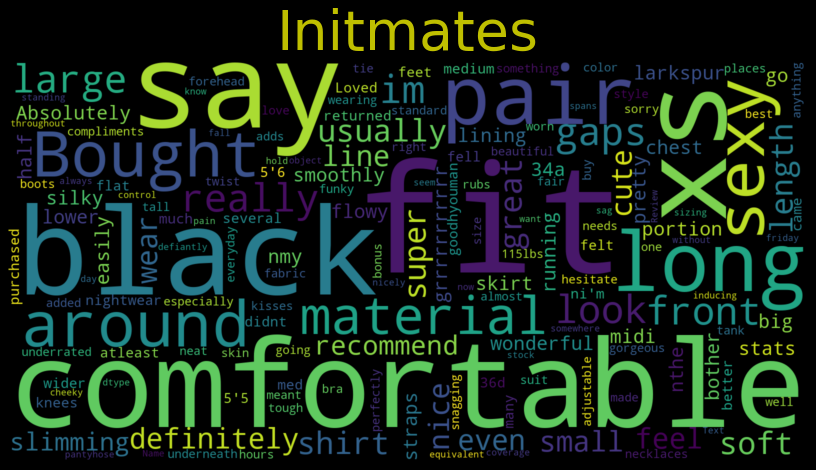

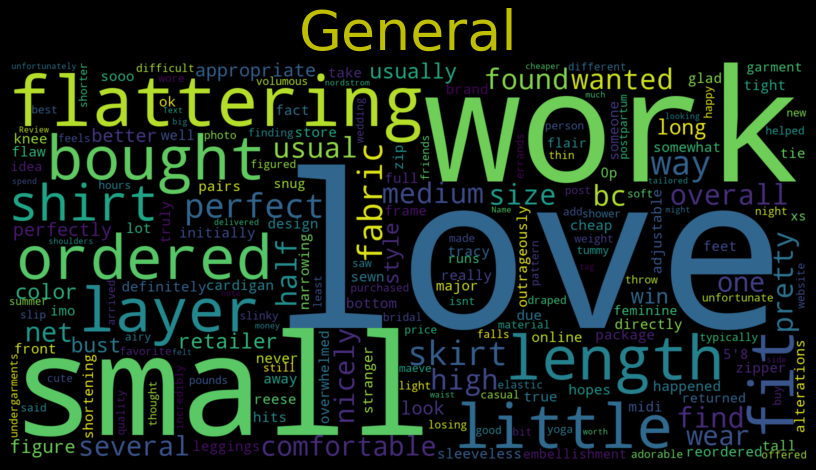

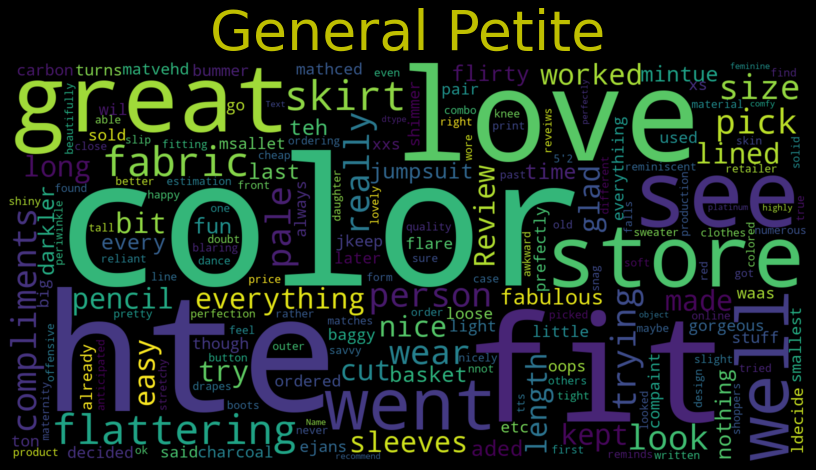

In [ ]:
department_set = data["Department Name"][data["Department Name"].notnull()].unique()
division_set = data["Division Name"][data["Division Name"].notnull()].unique()
def cloud_by_category(data, category, subclass):
    """
    Function to create a wordcloud by class and subclass
    Category signifies the column variable
    Subclass refers to the specific value within the categorical variable
    """
    new_stop = set(STOPWORDS)
    new_stop.update([x.lower() for x in list(data["Class Name"][data["Class Name"].notnull()].unique())]
                   + [x.lower() for x in list(data["Department Name"][data["Department Name"].notnull()].unique())]
                   + ["dress", "petite", "jacket","top"])

    # Cloud
    cloud(text= data["Review Text"][data[category]== subclass],
          title="{}".format(subclass),
          stopwords= new_stop,
          size = (10,6))
    
# Plot
cloud_by_category(data, "Division Name", division_set[0])
cloud_by_category(data, "Division Name", division_set[1])
cloud_by_category(data, "Division Name", division_set[2])

Text Preprocessing:


In [ ]:
dir(nltk)

['AbstractLazySequence',
 'AffixTagger',
 'AlignedSent',
 'Alignment',
 'AnnotationTask',
 'ApplicationExpression',
 'Assignment',
 'BigramAssocMeasures',
 'BigramCollocationFinder',
 'BigramTagger',
 'BinaryMaxentFeatureEncoding',
 'BlanklineTokenizer',
 'BllipParser',
 'BottomUpChartParser',
 'BottomUpLeftCornerChartParser',
 'BottomUpProbabilisticChartParser',
 'Boxer',
 'BrillTagger',
 'BrillTaggerTrainer',
 'CFG',
 'CRFTagger',
 'CfgReadingCommand',
 'ChartParser',
 'ChunkParserI',
 'ChunkScore',
 'ClassifierBasedPOSTagger',
 'ClassifierBasedTagger',
 'ClassifierI',
 'ConcordanceIndex',
 'ConditionalExponentialClassifier',
 'ConditionalFreqDist',
 'ConditionalProbDist',
 'ConditionalProbDistI',
 'ConfusionMatrix',
 'ContextIndex',
 'ContextTagger',
 'ContingencyMeasures',
 'CoreNLPDependencyParser',
 'CoreNLPParser',
 'Counter',
 'CrossValidationProbDist',
 'DRS',
 'DecisionTreeClassifier',
 'DefaultTagger',
 'DependencyEvaluator',
 'DependencyGrammar',
 'DependencyGraph',
 'Depen